In [3]:
%matplotlib inline
import wget

In [11]:
u='https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/sessions/plano-tx/data_1024.csv'

In [5]:
import sklearn.cluster

In [26]:
from scipy.spatial import Voronoi, voronoi_plot_2d


In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from pathlib import Path 
data_path = Path("/home/nithin/Documents/notebooks/data/kmean.csv")
#url = "htt0ps://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv"

In [15]:
d= wget.download(u)

100% [..............................................................................] 85448 / 85448

In [16]:
df = pd.read_csv(d, low_memory=False, sep="\t" , index_col=["Driver_ID"])

In [17]:
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


In [18]:
df.iloc[:,0]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
               ...  
3423310685    160.04
3423312600    176.17
3423312921    170.91
3423313630    176.14
3423311533    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

In [19]:
df["Distance_Feature"]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
               ...  
3423310685    160.04
3423312600    176.17
3423312921    170.91
3423313630    176.14
3423311533    168.03
Name: Distance_Feature, Length: 4000, dtype: float64

In [20]:
df.describe(include="all")

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


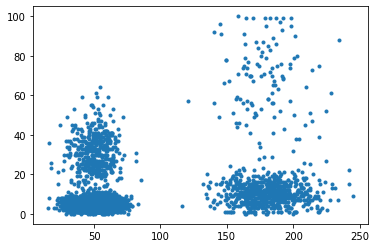

In [21]:
plt.plot(df["Distance_Feature"],df["Speeding_Feature"],  ".")

In [22]:
df.shape

(4000, 2)

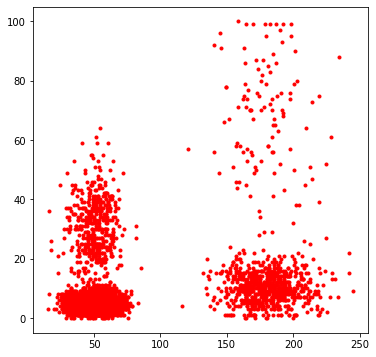

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1],marker=".", c="r")

In [24]:
X= StandardScaler().fit_transform(df)  # this is scaling 
X.shape

(4000, 2)

In [25]:
X

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [27]:
vor = Voronoi(X)

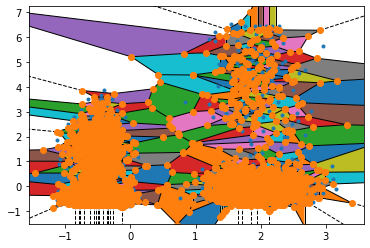

In [30]:
#vernoi diagram
voronoi_plot_2d(vor)

for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.show()

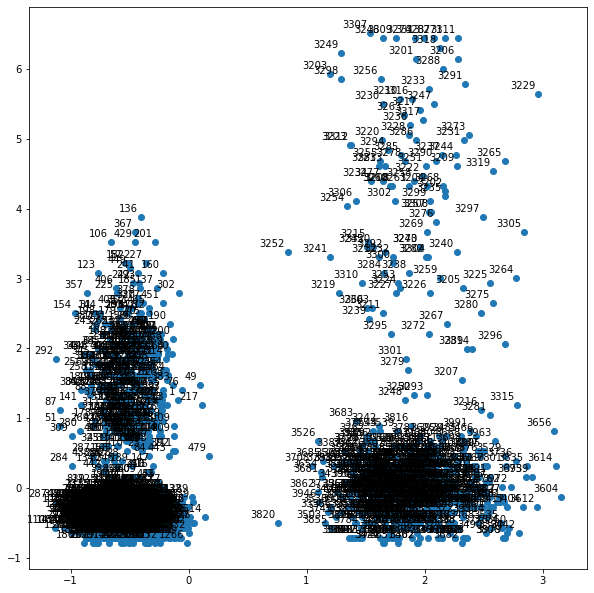

In [32]:
#dendogram
import matplotlib.pyplot as plt

labels = range(1, 4001)
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [20]:
X[0]

array([-0.0898104 ,  1.26061251])

In [24]:
kmeans = KMeans(n_clusters=2).fit(X)

In [29]:
y_pred = kmeans.predict(X)

In [32]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

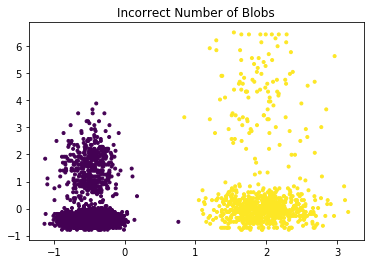

In [36]:

plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker=".")
plt.title("Incorrect Number of Blobs")

In [38]:
kmeans.predict(np.array([[-0.432537285,  0.04174351],
                     [-1.432537285,  2.04174351],
                     [-1.432537285,  6.04174351]]))

array([0, 0, 0], dtype=int32)

In [39]:
y_pred_li = y_pred.tolist()
y_pred_li = set(y_pred_li)
y_pred_li

{0, 1}

In [81]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

Text(0.5, 1.0, 'Incorrect Number of Blobs')

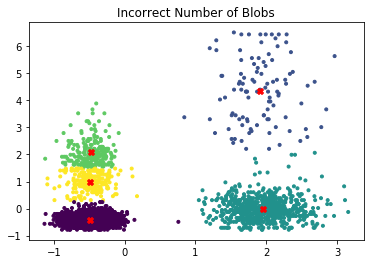

In [41]:
kmeans = KMeans(n_clusters=5).fit(X)
y_pred = kmeans.predict(X)
y_c= kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred,marker="." )
plt.scatter(y_c[:, 0], y_c[:, 1], marker="X" , c="r")

plt.title("Incorrect Number of Blobs")

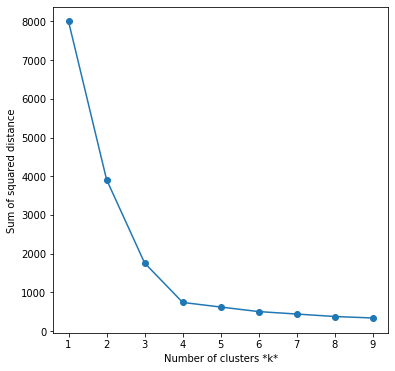

In [42]:
#Elbow 
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

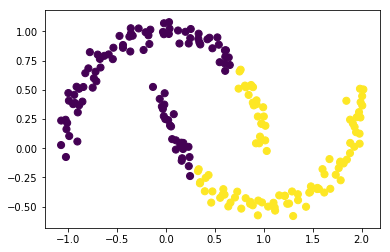

In [5]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/home/nithin/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


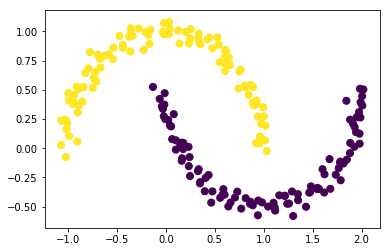

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');